By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/06

Videos:
* [[10分鐘搞懂機器學習] 7.2 決策樹的過度擬合 Decision tree Overfitting](https://youtu.be/hREWrL32I5A)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


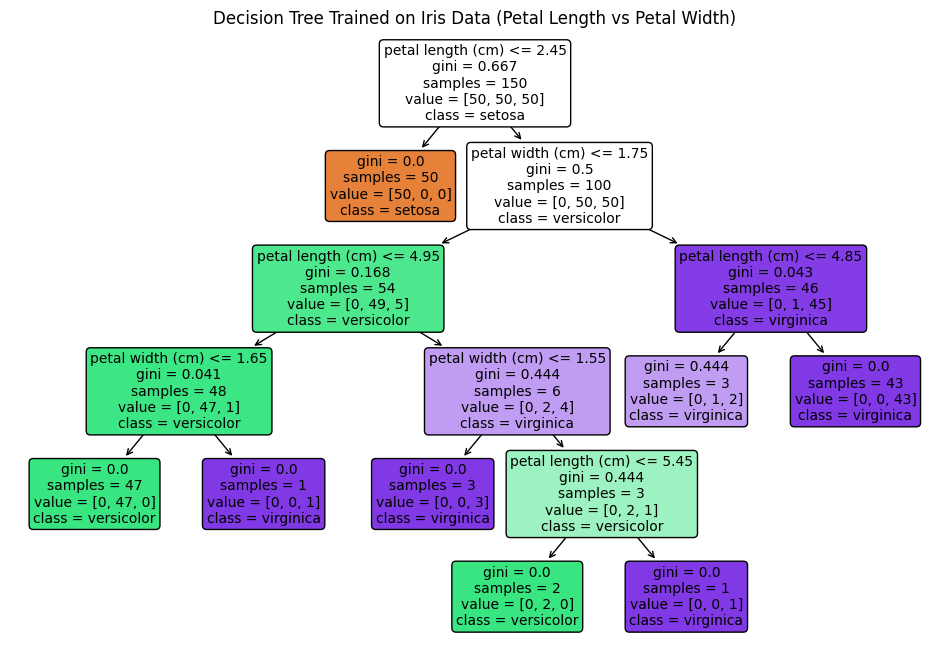

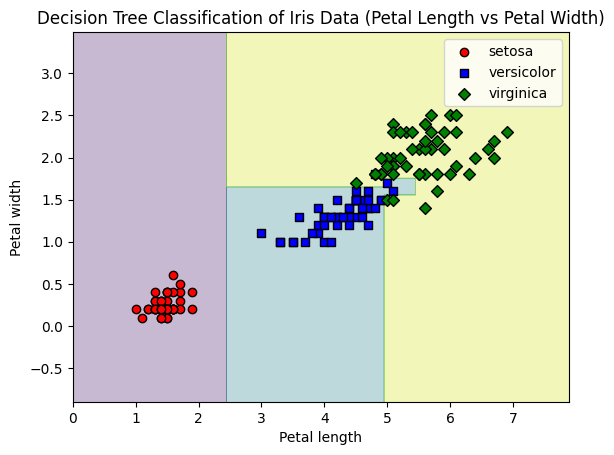

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 加载Iris数据集
iris = load_iris()
X = iris.data[:, 2:4]  # 选择特征 petal length 和 petal width
y = iris.target


# 创建决策树分类器并进行训练
# random_state=42,5
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)


# 可视化决策树
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names[2:4],
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Trained on Iris Data (Petal Length vs Petal Width)')
plt.show()



# 生成决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contourf(xx, yy, Z, alpha=0.3)

# 定义颜色和标记
colors = ['red', 'blue', 'green']
markers = ['o', 's', 'D']
labels = iris.target_names

# 绘制每一类的数据点
for i, color, marker, label in zip(range(3), colors, markers, labels):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=color, marker=marker, label=label, edgecolor='k')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision Tree Classification of Iris Data (Petal Length vs Petal Width)')
plt.legend()
plt.show()




Decision Trre Regressor 的過度擬合

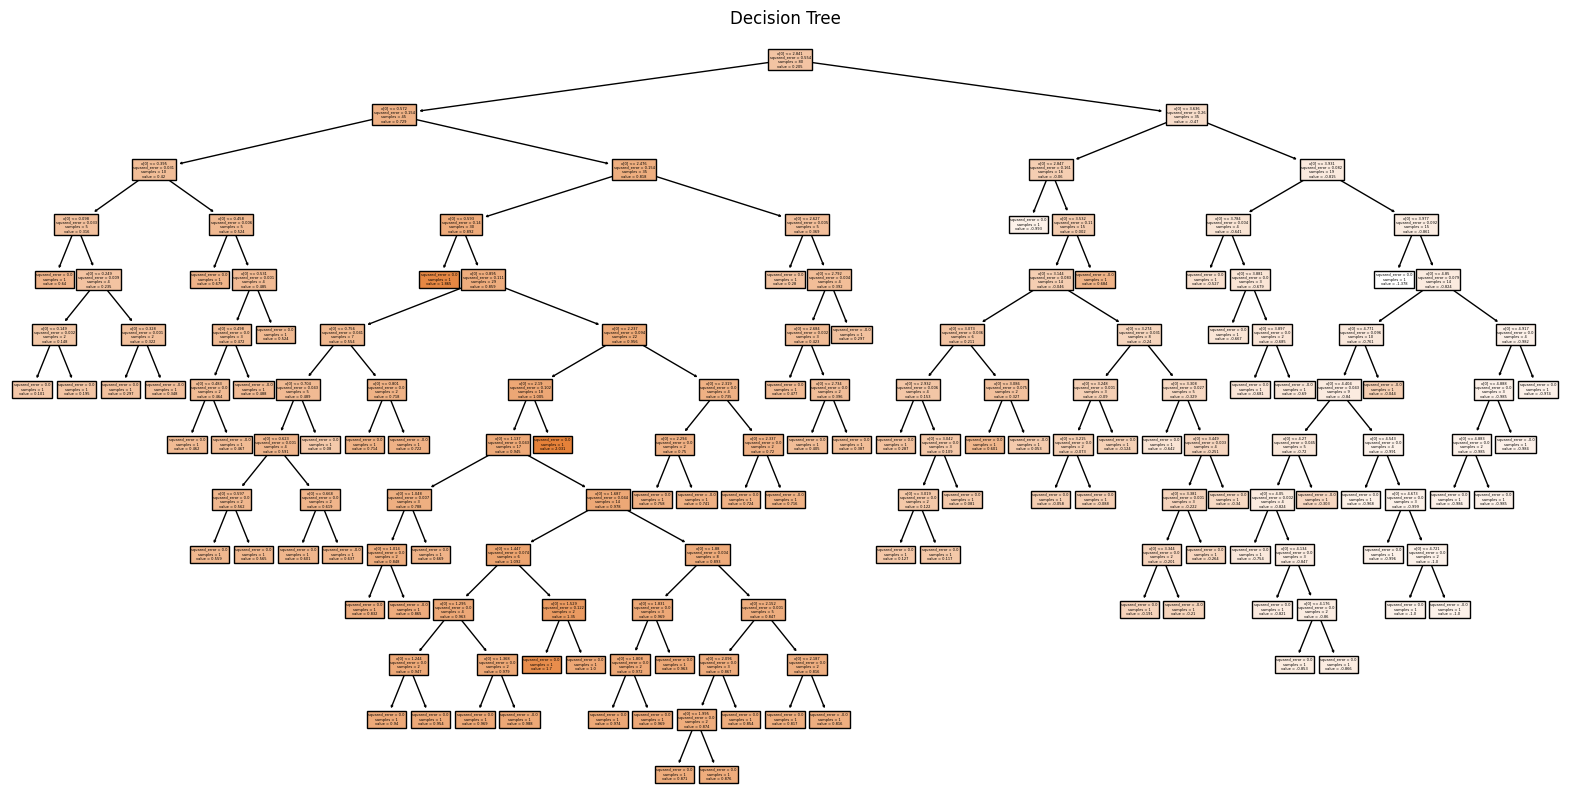

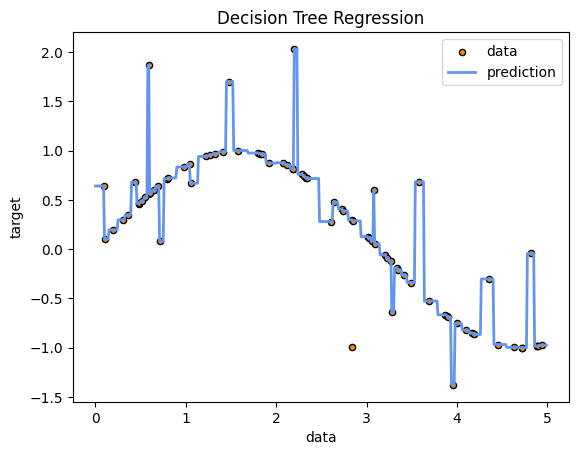

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# 生成示例数据
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# 创建和训练决策树回归模型
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

# 生成预测数据
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

# 可视化决策树
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True)
plt.title("Decision Tree")
plt.show()

# 可视化回归结果
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


後剪枝 post-pruning

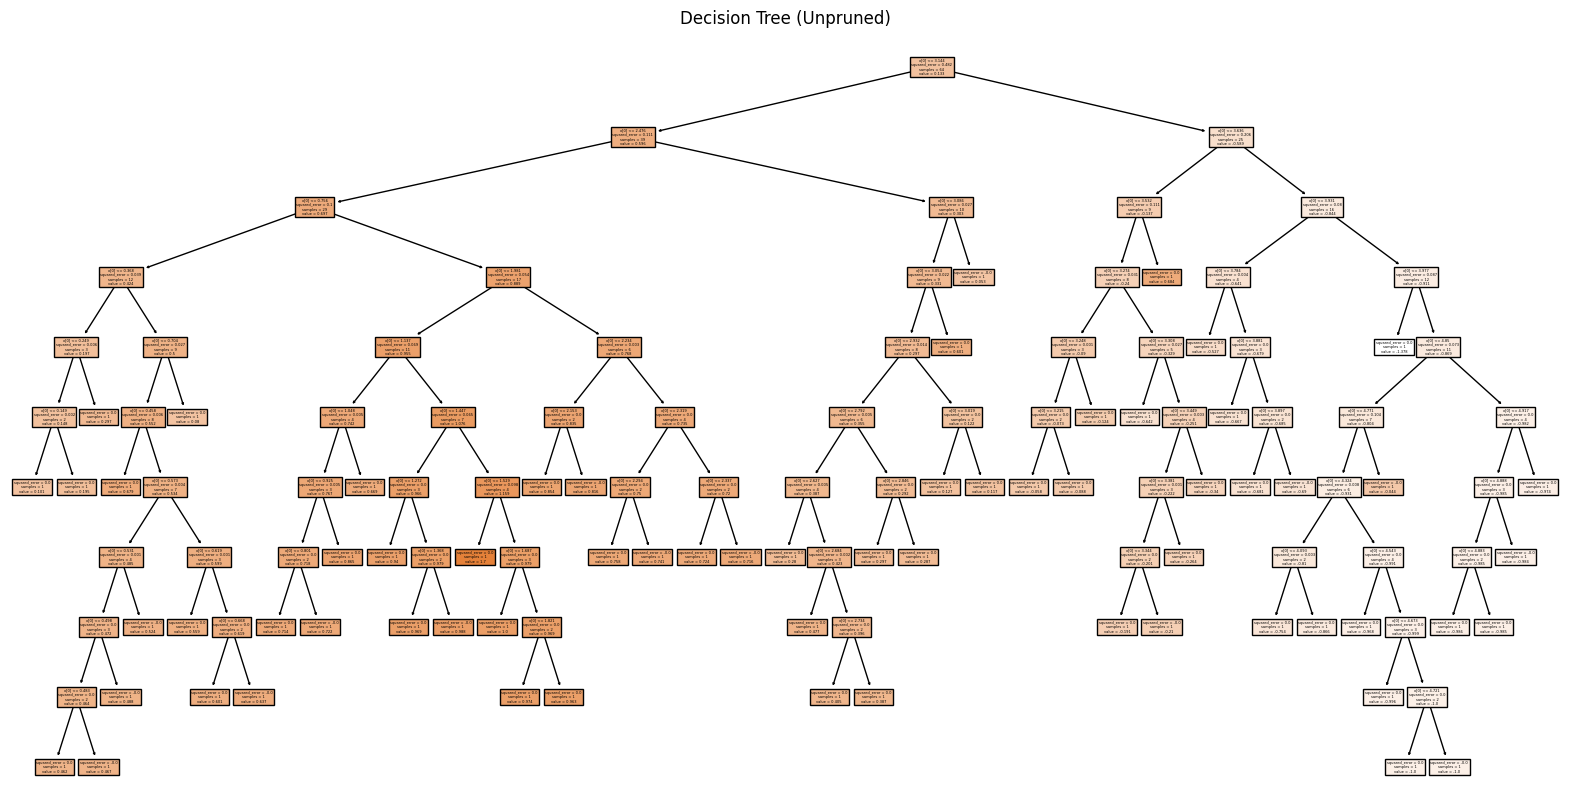

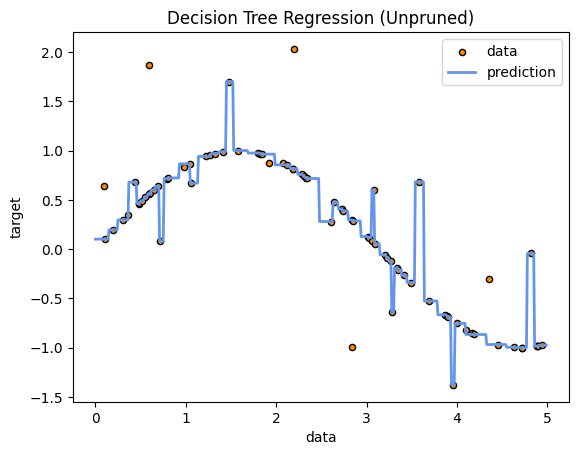

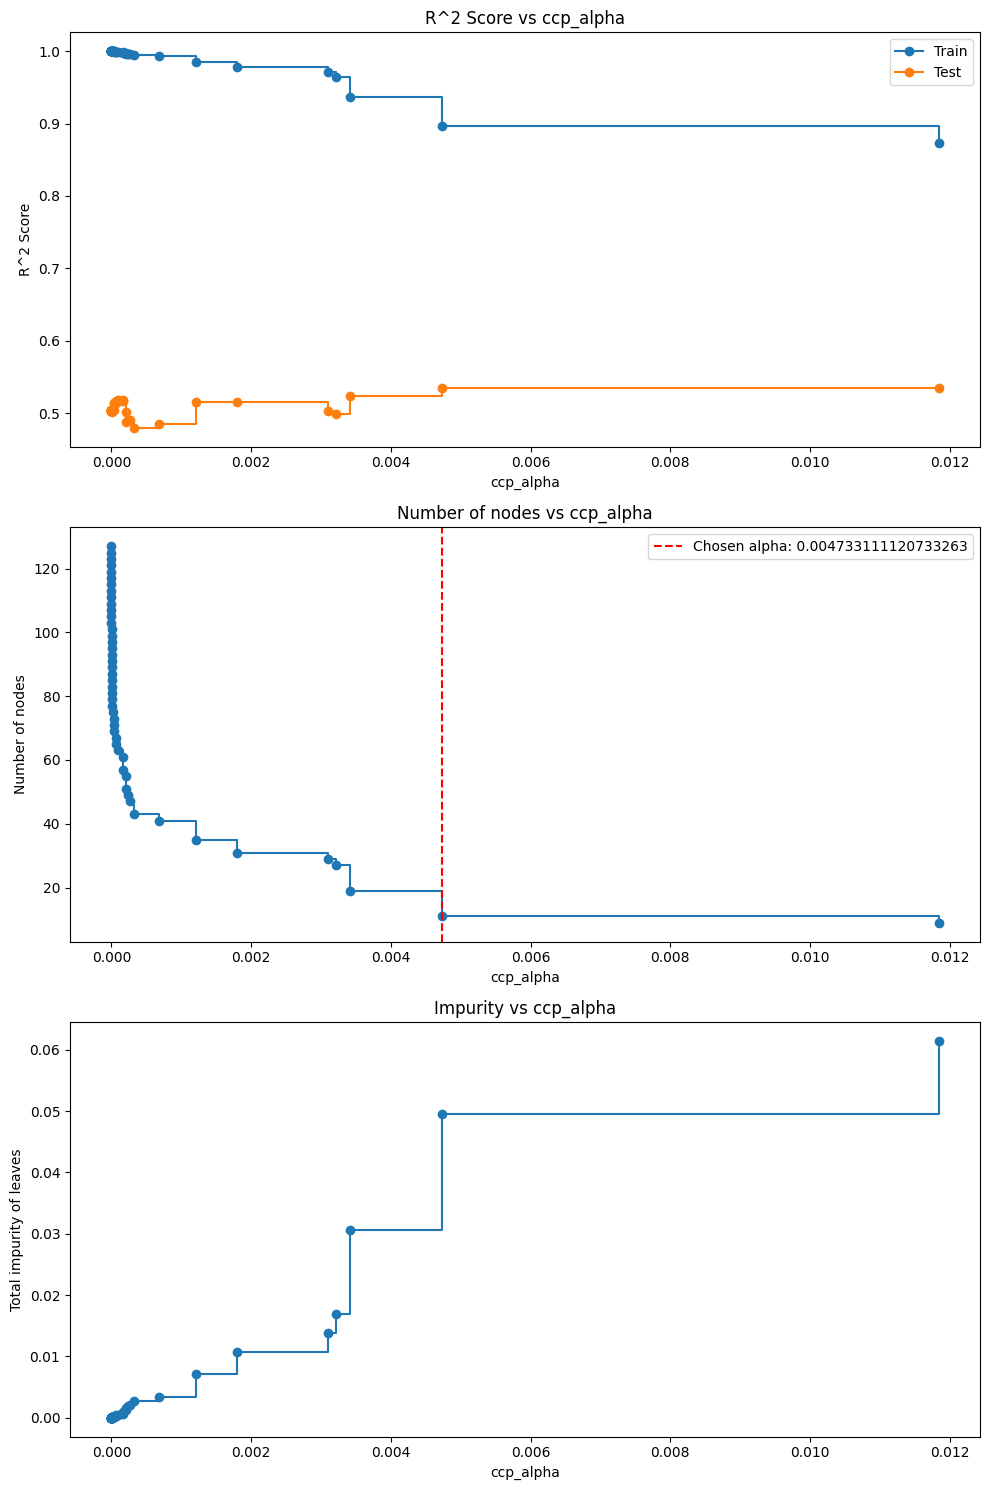

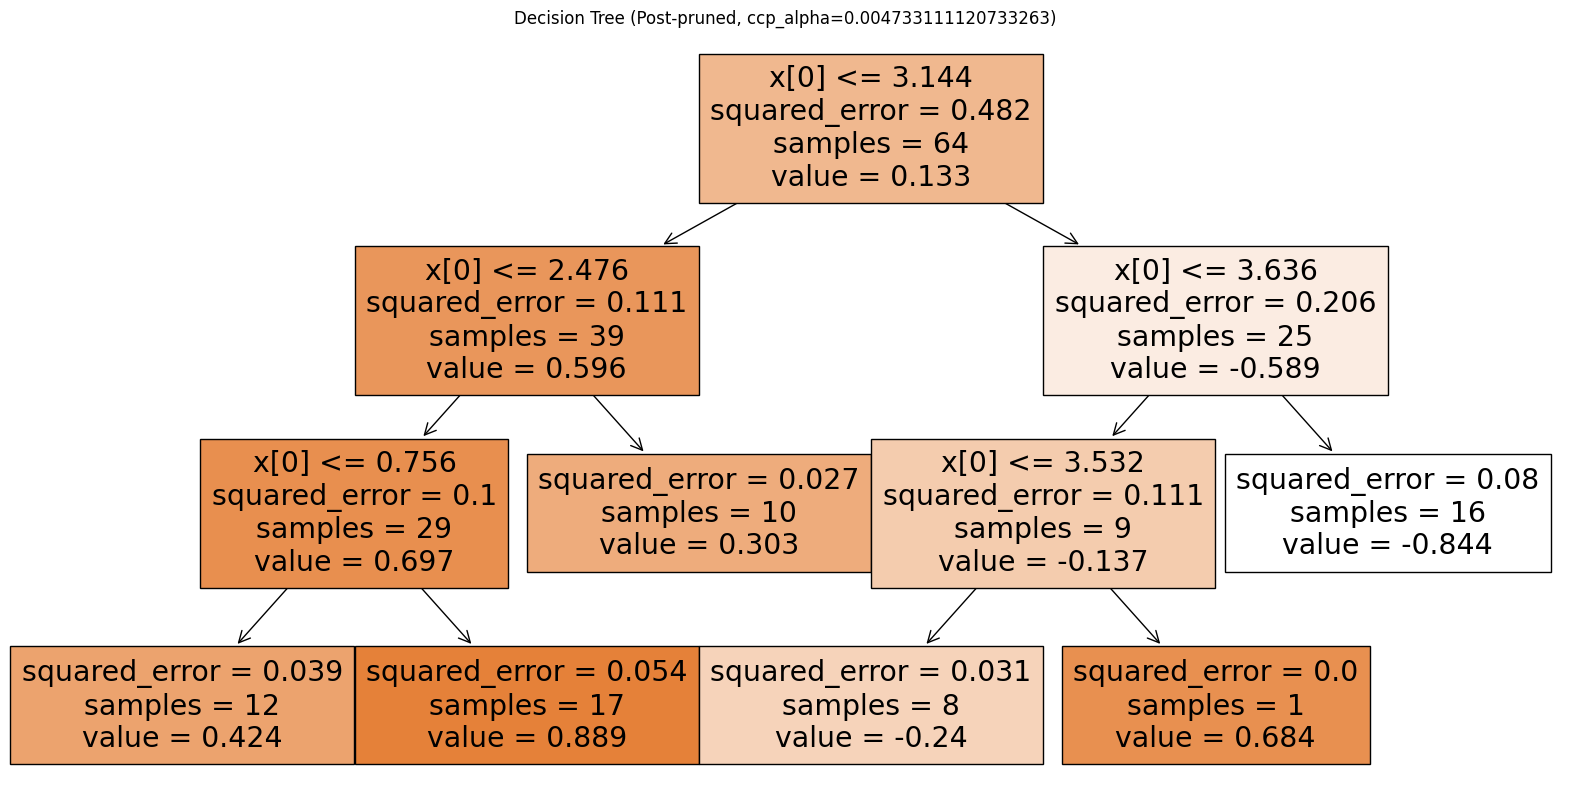

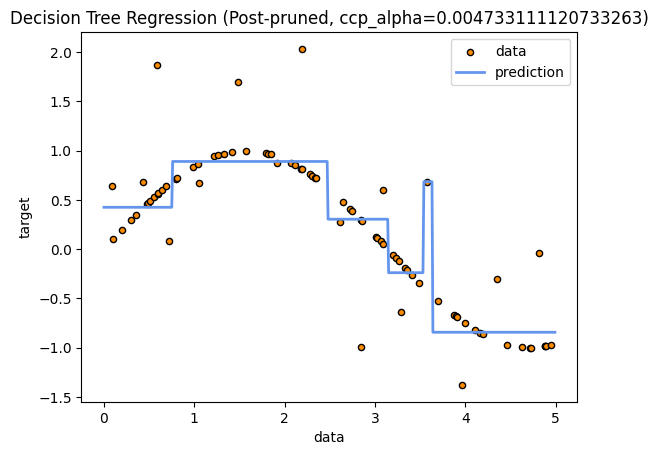

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

# 生成示例数据
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建和訓練決策樹回歸模型（未剪枝）
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# 生成预测数据
X_grid = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_grid)

# 可视化未剪枝的决策树
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True)
plt.title("Decision Tree (Unpruned)")
plt.show()

# 可视化未剪枝的回归结果
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_grid, y_pred, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression (Unpruned)")
plt.legend()
plt.show()

# 獲取成本複雜度剪枝路徑
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 限制ccp_alphas範圍在[0, 0.1]
ccp_alphas = ccp_alphas[ccp_alphas <= 0.02]
impurities = impurities[:len(ccp_alphas)]

# 基於不同的alpha值訓練多個決策樹模型
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# 繪製樹的複雜度（alpha）與其對應的樹的節點數和訓練集、測試集上的R^2分數變化
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
ax[0].plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
ax[0].plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
ax[0].set_xlabel("ccp_alpha")
ax[0].set_ylabel("R^2 Score")
ax[0].set_title("R^2 Score vs ccp_alpha")
ax[0].legend()

# 繪製樹的複雜度（alpha）與其對應的樹的節點數變化
node_counts = [clf.tree_.node_count for clf in clfs]
ax[1].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("ccp_alpha")
ax[1].set_ylabel("Number of nodes")
ax[1].set_title("Number of nodes vs ccp_alpha")

# 選擇最佳的alpha值並標示在圖上
optimal_alpha = ccp_alphas[np.argmax(test_scores)]
ax[1].axvline(x=optimal_alpha, color='r', linestyle='--', label=f'Chosen alpha: {optimal_alpha}')
ax[1].legend()

# 繪製 alpha 與對應的 impurities
ax[2].plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
ax[2].set_xlabel("ccp_alpha")
ax[2].set_ylabel("Total impurity of leaves")
ax[2].set_title("Impurity vs ccp_alpha")

plt.tight_layout()
plt.show()

# 使用最佳的alpha值訓練決策樹並視覺化
best_clf = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
best_clf.fit(X_train, y_train)

# 生成剪枝後的预测数据
y_pred_pruned = best_clf.predict(X_grid)

# 可视化剪枝後的决策树
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True)
plt.title(f"Decision Tree (Post-pruned, ccp_alpha={optimal_alpha})")
plt.show()

# 可视化剪枝後的回归结果
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_grid, y_pred_pruned, color="cornflowerblue", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title(f"Decision Tree Regression (Post-pruned, ccp_alpha={optimal_alpha})")
plt.legend()
plt.show()
